<h1 >                            Capstone Project - The Battle of the Neighborhoods : finding your best home </h1>

In [25]:
# import required libraries
import requests 
import pandas as pd
import numpy as np 
import random 

from IPython.display import Image 
from IPython.core.display import HTML     
from pandas.io.json import json_normalize
!pip install geocoder
!pip install geopy
!pip install beautifulsoup4
!pip install lxml
!pip install folium
from geopy.geocoders import Nominatim 

print('Libraries imported.')

Folium installed
Libraries imported.


In [26]:
CLIENT_ID = 'PC014OMYBFV30JOPMZGOW1SO0JTODT5KA5F1FO2C00ELOC2K' # your Foursquare ID
CLIENT_SECRET = 'LOH1O3UYQCR4WBCWYRXHRRRZZOCLTJKIO3KQ4Z1KENXZB4OR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PC014OMYBFV30JOPMZGOW1SO0JTODT5KA5F1FO2C00ELOC2K
CLIENT_SECRET:LOH1O3UYQCR4WBCWYRXHRRRZZOCLTJKIO3KQ4Z1KENXZB4OR


<h3> Part 1 : Creating Crime Dataset </h3>

In [27]:
df = pd.read_csv ('london_crime_by_lsoa.csv')

In [28]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [29]:
# Taking only the most recent year (2016) and dropping the rest
df.drop(df.index[df['year'] != 2016], inplace = True)

In [30]:
# Removing all the entires where crime values are null  
df = df[df.value != 0]

In [31]:
# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [32]:
df.shape

(30501, 7)

In [33]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [34]:
# set readable columnnames
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [35]:
# pivot table and bring major categories as column and borough as index
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                        \
Major_Category           Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham          112             147    65   
Barnet                        264             181    62   
Bexley                         77             140    62   
Brent                         213             180   145   
Bromley                       159             152    59   

                                                                           \
Major_Category       Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                        30      35                380   
Barnet                                      43      29                720   
Bexley                                      18      10                357   
Brent                                       41      59                689   
Bromley                                     34      25                557   

                                                  
Major_Category       Violence Against the Person  
Borough                                           
Barking and Dagenham                         460  
Barnet                                       583  
Bexley                                       354  
Brent                                        687  
Bromley                                      486

In [36]:
London_crime.reset_index(inplace = True)

In [37]:
London_crime.head()

Borough No_of_Crimes                        \
Major_Category                           Burglary Criminal Damage Drugs   
0               Barking and Dagenham          112             147    65   
1                             Barnet          264             181    62   
2                             Bexley           77             140    62   
3                              Brent          213             180   145   
4                            Bromley          159             152    59   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                     30      35                380   
1                                     43      29                720   
2                                     18      10                357   
3                                     41      59                689   
4                                     34      25                557   

                                            
Major_Category Violence Against the Person  
0                                      460  
1                                      583  
2                                      354  
3                                      687  
4                                      486

In [38]:
#add new total column
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head()

Borough No_of_Crimes                        \
Major_Category                           Burglary Criminal Damage Drugs   
0               Barking and Dagenham          112             147    65   
1                             Barnet          264             181    62   
2                             Bexley           77             140    62   
3                              Brent          213             180   145   
4                            Bromley          159             152    59   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                     30      35                380   
1                                     43      29                720   
2                                     18      10                357   
3                                     41      59                689   
4                                     34      25                557   

                                           Total  
Major_Category Violence Against the Person        
0                                      460  1229  
1                                      583  1882  
2                                      354  1018  
3                                      687  2014  
4                                      486  1472

In [39]:
# map all columnnames
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,112,147,65,30,35,380,460,1229
1,Barnet,264,181,62,43,29,720,583,1882
2,Bexley,77,140,62,18,10,357,354,1018
3,Brent,213,180,145,41,59,689,687,2014
4,Bromley,159,152,59,34,25,557,486,1472


In [40]:
# set new readable names to columns
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,112,147,65,30,35,380,460,1229
1,Barnet,264,181,62,43,29,720,583,1882
2,Bexley,77,140,62,18,10,357,354,1018
3,Brent,213,180,145,41,59,689,687,2014
4,Bromley,159,152,59,34,25,557,486,1472


In [41]:
London_crime.shape

(33, 9)

<h3> Part 2 : Creating Dataset of Borough of london </h3>

In [42]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text


In [43]:
from bs4 import BeautifulSoup

In [44]:
# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
soup.prettify()

'<?xml version="1.0" encoding="utf-8"?>\n<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="UTF-8"/>\n  <title>\n   List of London boroughs - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"859808ce-2192-40ae-b6ce-1f0957df47c7","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015",

In [45]:
table = soup.find_all('table', {'class':'wikitable sortable'})


In [46]:
London_table_all = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_table_all.shape

(32, 10)

In [47]:
London_table_all

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [48]:
# Read in the second table  because city of london is also a borough
London_table_citylondon = pd.read_html(str(table[1]), index_col=None, header=0)[0]

In [49]:
London_table_citylondon

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [50]:
# Rename the columns to match the previous table to append the tables.

London_table_citylondon.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

In [51]:
London_table_citylondon

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [52]:

# add the last table ie city of bororugh to table list
London_table_all = London_table_all.append(London_table_citylondon, ignore_index = True)


London_table_all = London_table_all.replace('note 1','', regex=True) 
London_table_all = London_table_all.replace('note 2','', regex=True) 
London_table_all = London_table_all.replace('note 3','', regex=True) 
London_table_all = London_table_all.replace('note 4','', regex=True) 
London_table_all = London_table_all.replace('note 5','', regex=True) 

London_table_all.shape

(33, 10)

In [53]:
London_table_all

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [],[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [54]:
# check which borough names are not matching between crime data and list of borroug

set(df.Borough)-set(London_table_all.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

In [55]:
London_table_all.iloc[0,0] = 'Barking and Dagenham'
London_table_all.iloc[9,0] = 'Greenwich'
London_table_all.iloc[11,0] = 'Hammersmith and Fulham'

In [56]:
# check which borough names are not matching between crime data and list of borough 
set(df.Borough) - set(London_table_all.Borough)

set()

In [57]:
# merge Crime data with Borough Data on Borough
Ld_crime = pd.merge(London_crime, London_table_all, on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,112,147,65,30,35,380,460,1229,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,264,181,62,43,29,720,583,1882,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,77,140,62,18,10,357,354,1018,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,213,180,145,41,59,689,687,2014,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,159,152,59,34,25,557,486,1472,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,210,177,178,34,77,930,634,2240,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,City of London,0,0,1,0,2,5,1,9,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
7,Croydon,158,245,99,53,67,789,794,2205,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
8,Ealing,175,215,96,41,64,767,762,2120,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
9,Enfield,186,133,90,43,60,625,598,1735,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30


In [58]:

set(df.Borough) - set(Ld_crime.Borough)

set()

In [59]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

In [60]:
Ld_crime = Ld_crime.reindex(columns=columnsTitles)

In [61]:
Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Inner,Status,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Co-ordinates
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,NaN,NaN,112,147,65,30,35,380,460,1229,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,NaN,NaN,264,181,62,43,29,720,583,1882,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,NaN,NaN,77,140,62,18,10,357,354,1018,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,NaN,NaN,213,180,145,41,59,689,687,2014,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,NaN,NaN,159,152,59,34,25,557,486,1472,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


In [62]:
Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]
Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,112,147,65,30,35,380,460,1229
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,264,181,62,43,29,720,583,1882
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,77,140,62,18,10,357,354,1018
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,213,180,145,41,59,689,687,2014
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,159,152,59,34,25,557,486,1472


In [63]:
London_crime.describe()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,157.787879,150.787879,96.181818,35.424242,50.242424,693.303030,551.878788,1735.606061
std,56.646247,49.085230,55.441103,15.960949,31.826709,356.684514,203.826942,700.219427
min,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,9.000000
25%,112.000000,108.000000,62.000000,23.000000,24.000000,459.000000,460.000000,1321.000000
50%,161.000000,153.000000,90.000000,34.000000,48.000000,659.000000,583.000000,1770.000000
75%,197.000000,180.000000,140.000000,47.000000,68.000000,839.000000,714.000000,2200.000000
max,264.000000,245.000000,255.000000,75.000000,123.000000,2054.000000,893.000000,3732.000000


In [64]:

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


In [65]:
Ld_crime.columns = list(map(str, Ld_crime.columns))
Ld_crime.columns

Index(['Borough', 'Local authority', 'Political control', 'Headquarters',
       'Area (sq mi)', 'Population (2013 est)[1]', 'Co-ordinates', 'Burglary',
       'Criminal Damage', 'Drugs', 'Other Notifiable Offences', 'Robbery',
       'Theft and Handling', 'Violence Against the Person', 'Total'],
      dtype='object')

<h5>Visualize the top 5  borough with higest crime and we will remove them from considering for settlement </h5>

In [66]:
#Sort crimes on descending order 
Ld_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )
# take top 5 crimerates and assign to another dataframe
Ld_crime_top5 = Ld_crime.head() 
Ld_crime_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
32,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,203,208,176,75,123,2054,893,3732
21,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,240,196,255,51,98,1037,856,2733
24,Newham,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,178,211,155,57,98,1184,714,2597
27,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,237,214,149,52,57,1028,732,2469
29,Tower Hamlets,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,222,179,140,52,104,927,680,2304


In [67]:
Ld_crime_map5 = Ld_crime_top5[['Borough','Total']]
Ld_crime_map5.set_index('Borough',inplace = True)

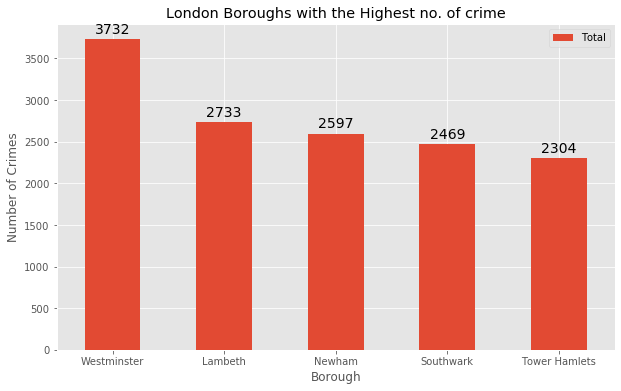

In [68]:
ax = Ld_crime_map5.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<h5>Visualize the top 5  borough with  lowest crime and we will use them from considering for settlement </h5>

In [69]:
# sort crime dataset in ascending
Ld_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )
Ld_crime_bot5 = Ld_crime.head() 
Ld_crime_bot5


,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,0,0,1,0,2,5,1,9
20,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,75,80,40,14,4,260,231,704
26,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,104,102,16,12,4,327,233,798
28,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,87,104,31,13,15,277,315,842
14,Harrow,Harrow London Borough Council,Labour,"Civic Centre, Station Road",19.49,243372,51°35′23″N 0°20′05″W﻿ / ﻿51.5898°N 0.3346°W,118,104,37,22,24,369,306,980


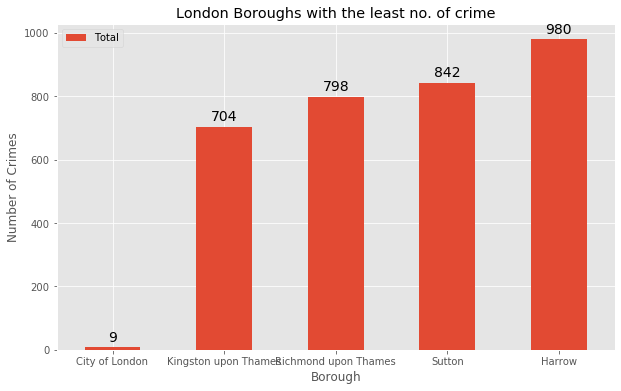

In [70]:

df_bt = Ld_crime_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<h6>The borough city of London  and Kingston Upon Thames has  the lowest no. of crimes recorded for the year 2016. Let us check the details of the borough</h6

In [71]:
# lets check london city details
df_lon_city = Ld_crime_bot5[Ld_crime_bot5['Borough'] == 'City of London']
df_lon_city = df_lon_city[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_lon_city

,Borough,Total,Area (sq mi),Population (2013 est)[1]
6,City of London,9,1.12,7000


In [72]:
# lets check london city details
df_Kingston = Ld_crime_bot5[Ld_crime_bot5['Borough'] == 'Kingston upon Thames']
df_Kingston = df_Kingston[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_Kingston

,Borough,Total,Area (sq mi),Population (2013 est)[1]
20,Kingston upon Thames,704,14.38,166793


<h5>We will exclude City of London governed by corperation dues to some personal preference and issue of availabiltiy and will concnetrate in Kingston upon Thames  </h5>

In [73]:
Ld_crime_king =  Ld_crime_bot5[Ld_crime_bot5['Borough'] == 'Kingston upon Thames']
df_Kingston_main = Ld_crime_king[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]
df_Kingston_main.set_index('Borough',inplace = True)
df_Kingston_main

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person
Borough,,,,,,,
Kingston upon Thames,75,80,40,14,4,260,231


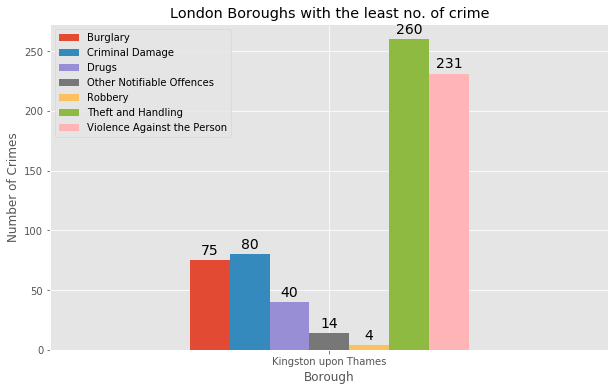

In [74]:
# we can just visualize to see the crimes
ax = df_Kingston_main.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<h3> Part 3 : Getting the Neighbourhood of Royal Borough of Kingston upon Thames </h3>

In [75]:
# getting data from internet
wikipedia_linkforking='https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames'
#raw_wikipedia_pageforking= requests.get(wikipedia_linkforking).text

In [76]:
Neighborhoodofking = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

In [77]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)
kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [81]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [85]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)
print(len(kut_neig['Neighborhood'].unique()))
kut_neig



15


,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [86]:
# Now lets create a map of London to show neighbourhoods

# let start with canbury we know latitude is 51.41 but lets reconfirm

address = 'Canbury, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.41749865, -0.30555280504926163.


In [88]:
import folium

In [90]:
# Now we can create map

# create map of New York using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)     
map_london  


In [91]:

print(len(kut_neig['Neighborhood'].unique()))
kut_neig

15


,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [112]:
# lets find out all the venues near each Neighbooorhood


# lets create a function for it

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)     
        # create the API request Foursquare API using credential
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # extract only needed information
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)    

In [115]:
kingston_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [114]:
kingston_venues.shape

(169, 7)

In [95]:
len(kingston_venues['Neighborhood'].unique())

13

In [98]:
set(kut_neig['Neighborhood'].unique())-set(kingston_venues['Neighborhood'].unique())

{'Chessington', 'Coombe'}

In [99]:
kingston_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub


In [100]:

# get te count of every venue by neighboorhood
kingston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,3,3,3,3,3,3
Canbury,15,15,15,15,15,15
Hook,4,4,4,4,4,4
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,5,5,5,5,5,5
New Malden,7,7,7,7,7,7
Norbiton,26,26,26,26,26,26


In [101]:
kingston_venues['Venue Category'].unique()

array(['Gym / Fitness Center', 'Park', 'Bus Stop', 'Pub', 'Café',
       'Fish & Chips Shop', 'Hotel', 'Plaza', 'Supermarket',
       'Indian Restaurant', 'River', 'Shop & Service', 'Spa', 'Bakery',
       'Market', 'Record Shop', 'Theater', 'Cosmetics Shop',
       'German Restaurant', 'Burger Joint', 'Department Store',
       'Cajun / Creole Restaurant', 'Coffee Shop', 'French Restaurant',
       'Sushi Restaurant', 'Thai Restaurant', 'Furniture / Home Store',
       'Portuguese Restaurant', 'Electronics Store', 'Beer Bar',
       'Latin American Restaurant', 'Gift Shop', 'Asian Restaurant',
       'Mexican Restaurant', 'Sandwich Place', 'Bar', 'Soccer Field',
       'Grocery Store', 'Garden Center', 'Restaurant', 'Gym',
       'Korean Restaurant', 'Gastropub', 'Japanese Restaurant',
       'Italian Restaurant', 'Breakfast Spot', 'Seafood Restaurant',
       'Pharmacy', 'Pizza Place', 'Food', 'Rental Car Location',
       'Fried Chicken Joint', 'Hardware Store', 'Platform', 'Bagel S

In [102]:
len(kingston_venues['Neighborhood'].unique())

13

In [103]:
kingston_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub
...,...,...,...,...,...,...,...
164,Tolworth,51.378876,-0.282860,LloydsPharmacy,51.381273,-0.283112,Pharmacy
165,Tolworth,51.378876,-0.282860,Tolworth Bus Stop B,51.377780,-0.279041,Bus Stop
166,Tolworth,51.378876,-0.282860,Viana Restaurant,51.382067,-0.284743,Restaurant
167,Tolworth,51.378876,-0.282860,Ristorante Sorrento,51.382500,-0.285996,Italian Restaurant


In [104]:
# now lets create a dummy dataset with all type of venues in column 
Kingston_venuetop = pd.get_dummies(kingston_venues[['Venue Category']], prefix="", prefix_sep="")

In [105]:
Kingston_venuetop

,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# add neighborhood column  and assign it with value from 
Kingston_venuetop['Neighborhood'] = kingston_venues['Neighborhood'] 
Kingston_venuetop

,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Berrylands
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Berrylands
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Berrylands
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Canbury
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Canbury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tolworth
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tolworth
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tolworth
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tolworth


In [107]:
#move Neighorhood to first column
fixed_columns = [Kingston_venuetop.columns[-1]] + list(Kingston_venuetop.columns[:-1])
Kingston_venuetop = Kingston_venuetop[fixed_columns]

Kingston_venuetop

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Tolworth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,Tolworth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,Tolworth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,Tolworth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# group the dataset and get count of every category to known hhowmnay are there

Kingston_venuetot = Kingston_venuetop.groupby('Neighborhood').mean().reset_index()
print(len(Kingston_venuetot['Neighborhood'].unique()))
Kingston_venuetot


13


,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Hook,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kingston Vale,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston upon Thames,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.000000
5,Malden Rushett,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Motspur Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,New Malden,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
8,Norbiton,0.000000,0.038462,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.038462,0.000000,0.000000,0.038462
9,Old Malden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000


In [116]:
num_top_venues = 5

for hood in Kingston_venuetot['Neighborhood']:
    print("----"+hood+"----")
    temp = Kingston_venuetot[Kingston_venuetot['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                   venue  freq
0   Gym / Fitness Center  0.33
1               Bus Stop  0.33
2                   Park  0.33
3  Portuguese Restaurant  0.00
4             Playground  0.00


----Canbury----
               venue  freq
0                Pub  0.27
1     Shop & Service  0.07
2              Hotel  0.07
3  Indian Restaurant  0.07
4               Park  0.07


----Hook----
               venue  freq
0  Indian Restaurant  0.25
1             Bakery  0.25
2  Fish & Chips Shop  0.25
3        Supermarket  0.25
4   Asian Restaurant  0.00


----Kingston Vale----
            venue  freq
0    Soccer Field  0.25
1   Grocery Store  0.25
2             Bar  0.25
3  Sandwich Place  0.25
4          Market  0.00


----Kingston upon Thames----
              venue  freq
0              Café  0.10
1  Sushi Restaurant  0.07
2               Pub  0.07
3      Burger Joint  0.07
4       Coffee Shop  0.07


----Malden Rushett----
              venue  freq
0               Pub  0.25
1     

In [117]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [121]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Kingston_venuetot['Neighborhood']

for ind in np.arange(Kingston_venuetot.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Kingston_venuetot.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Bus Stop,Wine Shop,Food,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
1,Canbury,Pub,River,Café,Supermarket,Spa,Gym / Fitness Center,Shop & Service,Fish & Chips Shop,Plaza,Park
2,Hook,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Wine Shop,French Restaurant,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant
3,Kingston Vale,Sandwich Place,Grocery Store,Bar,Soccer Field,Wine Shop,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
4,Kingston upon Thames,Café,Pub,Sushi Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,German Restaurant,Gift Shop,French Restaurant,Electronics Store


<h4> lets do a K Mean  to cluster Neighborhoods</h4>

In [123]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = Kingston_venuetot.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 4, 1, 3, 1, 2, 3, 3, 0], dtype=int32)

In [134]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



ValueError: cannot insert Cluster Labels, already exists

In [135]:
kingston_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kingston_merged = kingston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kingston_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2.0,Gym / Fitness Center,Park,Bus Stop,Wine Shop,Food,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
1,Canbury,Kingston upon Thames,51.417499,-0.305553,3.0,Pub,River,Café,Supermarket,Spa,Gym / Fitness Center,Shop & Service,Fish & Chips Shop,Plaza,Park
2,Chessington,Kingston upon Thames,51.358336,-0.298622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coombe,Kingston upon Thames,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hook,Kingston upon Thames,51.367898,-0.307145,4.0,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Wine Shop,French Restaurant,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant


In [136]:
kingston_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            15 non-null     object 
 1   Borough                 15 non-null     object 
 2   Latitude                15 non-null     float64
 3   Longitude               15 non-null     float64
 4   Cluster Labels          13 non-null     float64
 5   1st Most Common Venue   13 non-null     object 
 6   2nd Most Common Venue   13 non-null     object 
 7   3rd Most Common Venue   13 non-null     object 
 8   4th Most Common Venue   13 non-null     object 
 9   5th Most Common Venue   13 non-null     object 
 10  6th Most Common Venue   13 non-null     object 
 11  7th Most Common Venue   13 non-null     object 
 12  8th Most Common Venue   13 non-null     object 
 13  9th Most Common Venue   13 non-null     object 
 14  10th Most Common Venue  13 non-null     obje

In [137]:
kingston_merged.dropna(inplace = True)
kingston_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)
kingston_merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2,Gym / Fitness Center,Park,Bus Stop,Wine Shop,Food,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
1,Canbury,Kingston upon Thames,51.417499,-0.305553,3,Pub,River,Café,Supermarket,Spa,Gym / Fitness Center,Shop & Service,Fish & Chips Shop,Plaza,Park
4,Hook,Kingston upon Thames,51.367898,-0.307145,4,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Wine Shop,French Restaurant,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,3,Café,Pub,Sushi Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,German Restaurant,Gift Shop,French Restaurant,Electronics Store
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,1,Sandwich Place,Grocery Store,Bar,Soccer Field,Wine Shop,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Grocery Store,Pub,Garden Center,Restaurant,Wine Shop,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,2,Gym,Park,Bus Stop,Restaurant,Soccer Field,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market
9,New Malden,Kingston upon Thames,51.405335,-0.263407,3,Gym,Sushi Restaurant,Korean Restaurant,Bar,Supermarket,Indian Restaurant,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,3,Food,Indian Restaurant,Italian Restaurant,Pub,Wine Shop,Rental Car Location,Hardware Store,Hotel,Japanese Restaurant,Coffee Shop
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,0,Construction & Landscaping,Pub,Food,Train Station,Bagel Shop,Department Store,Golf Course,Gift Shop,German Restaurant,Gastropub


In [138]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kingston_merged['Latitude'], kingston_merged['Longitude'], kingston_merged['Neighborhood'], kingston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

<h3> Analysis </h3>

We now have neighboorhood clusters of  Royal Borough of Kingston upon Thames   we can look into it to find one cluster which  customer will be interest to settle down based on the venues nearby and thier interest 

Cluster 1


In [139]:
kingston_merged[kingston_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,1,Sandwich Place,Grocery Store,Bar,Soccer Field,Wine Shop,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Grocery Store,Pub,Garden Center,Restaurant,Wine Shop,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,1,Grocery Store,Pharmacy,Restaurant,Discount Store,Hotel,Bus Stop,Italian Restaurant,Sandwich Place,Bowling Alley,Soccer Field


Cluster 2

In [140]:
kingston_merged[kingston_merged['Cluster Labels'] == 2]


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2,Gym / Fitness Center,Park,Bus Stop,Wine Shop,Food,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,2,Gym,Park,Bus Stop,Restaurant,Soccer Field,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market


Cluster 3

In [141]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,3,Pub,River,Café,Supermarket,Spa,Gym / Fitness Center,Shop & Service,Fish & Chips Shop,Plaza,Park
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,3,Café,Pub,Sushi Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,German Restaurant,Gift Shop,French Restaurant,Electronics Store
9,New Malden,Kingston upon Thames,51.405335,-0.263407,3,Gym,Sushi Restaurant,Korean Restaurant,Bar,Supermarket,Indian Restaurant,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,3,Food,Indian Restaurant,Italian Restaurant,Pub,Wine Shop,Rental Car Location,Hardware Store,Hotel,Japanese Restaurant,Coffee Shop
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,3,Indian Restaurant,Coffee Shop,Pub,Gym,Pet Café,Playground,Chinese Restaurant,Café,Restaurant,Fast Food Restaurant
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,3,Coffee Shop,Pub,Pharmacy,Italian Restaurant,Grocery Store,Gym / Fitness Center,Deli / Bodega,Farmers Market,Gastropub,Hotel


Cluster 4

In [142]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hook,Kingston upon Thames,51.367898,-0.307145,4,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Wine Shop,French Restaurant,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant


<h2>Results and Recommendations</h2>

This aim of the project was to find the safest borough and to determine the best bneighbourhood in that Borough, We had done the research with the available information and provided 4 clusters . the user can easily select from the above clusters

Recommendations are just based on the data and doesn't consider the personal preferences  and sentiments

<ul> 
<li>If you are  considering public transport and entertainment  then  cluster 2 is recommended</li>
<li>If you are  considering an area with good restaurants, pubs and bar cluster 3 is recommended</li>
</ul> 



<h2>Conclusion</h2>
We had made a recomendation based on the veneue data available ,We had taken safety as primary concern and then most common venue to create cluster among that place.Its alway better to phyically visit the place before taking decision. Also coast of living and real estate cost is not taken into consideration , which can be alater added as an enhancement to this project


  
